In [1]:
import pandas as pd
from requests import get
import seaborn as sns
from bs4 import BeautifulSoup as Soup
import numpy as np
import matplotlib.pyplot as plt



In [2]:
url = get ('https://en.wikipedia.org/wiki/Golden_Globe_Award_for_Best_Television_Series_%E2%80%93_Musical_or_Comedy')
   
request = url.text

soup_data= Soup (request,'html.parser')
soup_data.title.tex


In [3]:
series = soup_data.findAll ('table',{'class':'wikitable'})
    
df = pd.read_html (str(series))

In [4]:
df2=pd.concat([df[4], df[5],df[6]])
df2.reset_index(drop=True)
df2

,Year,Program,Network
0,2000,Sex and the City,HBO
1,2000,Ally McBeal,Fox
2,2000,Frasier,NBC
3,2000,Malcolm in the Middle,Fox
4,2000,Will & Grace,NBC
...,...,...,...
0,2020,Schitt's Creek,Pop
1,2020,Emily in Paris,Netflix
2,2020,The Flight Attendant,HBO Max
3,2020,The Great,Hulu


In [5]:
df2['Network'].value_counts()


HBO            24
NBC            21
ABC            12
Showtime       11
Fox            11
Prime Video     9
Netflix         7
CBS             3
Hulu            2
The CW          1
USA             1
HBO Max         1
UPN             1
BBC America     1
Pop             1
FX              1
Apple TV+       1
Name: Network, dtype: int64

In [6]:
df2 ['Network'] = df2 ['Network'].replace('HBO Max','HBO')
df2 ['Network'].value_counts()

HBO            25
NBC            21
ABC            12
Showtime       11
Fox            11
Prime Video     9
Netflix         7
CBS             3
Hulu            2
USA             1
The CW          1
UPN             1
BBC America     1
Pop             1
FX              1
Apple TV+       1
Name: Network, dtype: int64

In [9]:
# df2.loc[df2['Network'] == 'Netflix']
df3=df2.loc[df2['Network'].isin(['Netflix','Prime Video','Hulu','HBO','Disney+'])]
df3['Network'].value_counts()


HBO            25
Prime Video     9
Netflix         7
Hulu            2
Name: Network, dtype: int64

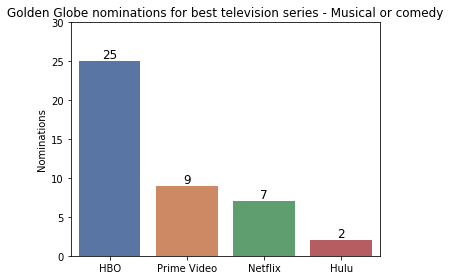

In [10]:
Total=df3['Network'].value_counts().sum()

values = df3['Network'].value_counts().keys().tolist()
counts = df3['Network'].value_counts().tolist()

sns.barplot(x=values,y=counts, palette="deep")
ax = plt.gca()

position = 0
for value in counts:
        ax.text(position, value, '{:.0f}'.format(value ), color = 'black', ha = 'center', size = 'large' , va = 'bottom')
        
        position = position + 1

plt.ylabel('Nominations')
plt.ylim(top=30)
plt.title('Golden Globe nominations for best television series - Musical or comedy')  
plt.tight_layout()
plt.show()

In [21]:
# df4=df2.loc[df2['Network'].isin(['Netflix','Prime Video','Hulu','HBO','Disney+'])]
# df4['Network'].loc[df4['Program'] == val]   

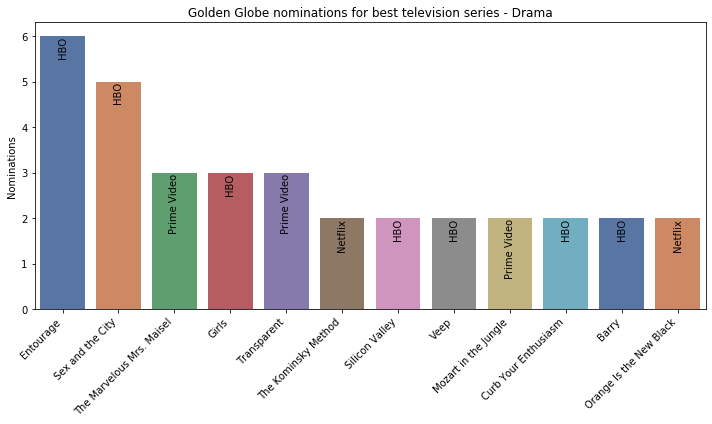

In [41]:
serie_list=[]
plt.figure(figsize=(10,6))

Total=df4['Program'].value_counts().sum()

values = df4['Program'].value_counts().keys().tolist()
counts = df4['Program'].value_counts().tolist()
values_aux = values [0:12] # nome série
counts_aux = counts [0:12] # numero de vezes nomeado

for val in values_aux:
    
    serie = df4['Network'].loc[df4['Program'] == val]   
    
    serie_list.append(serie.iloc[0])



sns.barplot(x=values_aux,y=counts_aux, palette="deep")
ax = plt.gca()
ax.set_xticklabels(values_aux, rotation = 45 , ha='right')


position = 0
for val in counts_aux:
        
        ax.text(position, val, serie_list[position], color = 'black',
                ha = 'center', size = 'medium' , va = 'top', rotation = 90)
        
        position = position + 1
plt.ylabel('Nominations')
plt.title('Golden Globe nominations for best television series - Drama')   

plt.tight_layout()
plt.show()

In [25]:
df2.head(n=10)

,Year,Program,Network
0,2000,Sex and the City,HBO
1,2000,Ally McBeal,Fox
2,2000,Frasier,NBC
3,2000,Malcolm in the Middle,Fox
4,2000,Will & Grace,NBC
5,2001,Sex and the City,HBO
6,2001,Ally McBeal,Fox
7,2001,Frasier,NBC
8,2001,Friends,NBC
9,2001,Will & Grace,NBC


In [26]:
ano = df2.loc[df2['Year'] == 2000] 
ano.iloc[0]

Year                   2000
Program    Sex and the City
Network                 HBO
Name: 0, dtype: object

In [27]:
anos=df2['Year'].unique()


In [28]:
df_winners = pd.DataFrame()
for ano in anos:
    ano_aux = df2.loc[df2['Year'] == ano] 
#     print(ano_aux.iloc[0])
    df_winners = df_winners.append(ano_aux.iloc[0])
df_winners


,Network,Program,Year
0,HBO,Sex and the City,2000.0
5,HBO,Sex and the City,2001.0
10,HBO,Curb Your Enthusiasm,2002.0
15,BBC America,The Office,2003.0
20,ABC,Desperate Housewives,2004.0
25,ABC,Desperate Housewives,2005.0
31,ABC,Ugly Betty,2006.0
36,HBO,Extras,2007.0
41,NBC,30 Rock,2008.0
46,Fox,Glee,2009.0


In [29]:
df_winners_particular=df_winners.loc[df_winners['Network'].isin(['Netflix','Prime Video','Hulu','HBO','Disney+'])]

In [30]:
df_winners_particular

,Network,Program,Year
0,HBO,Sex and the City,2000.0
5,HBO,Sex and the City,2001.0
10,HBO,Curb Your Enthusiasm,2002.0
36,HBO,Extras,2007.0
11,HBO,Girls,2012.0
21,Prime Video,Transparent,2014.0
26,Prime Video,Mozart in the Jungle,2015.0
37,Prime Video,The Marvelous Mrs. Maisel,2017.0
42,Netflix,The Kominsky Method,2018.0
47,Prime Video,Fleabag,2019.0


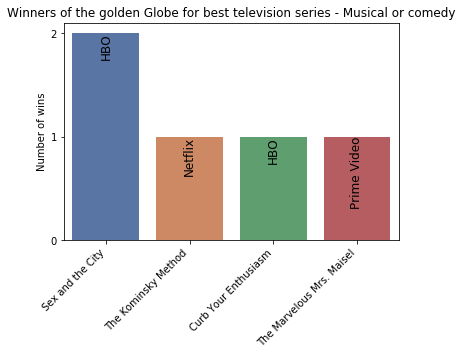

In [32]:
from matplotlib.ticker import MaxNLocator
serie_list=[]
ano_list=[]

Total=df_winners_particular['Program'].value_counts().sum()

values = df_winners_particular['Program'].value_counts().keys().tolist()
counts = df_winners_particular['Program'].value_counts().tolist()
values_aux = values [0:4] # nome série
counts_aux = counts [0:4] # numero de vezes nomeado

for val in values_aux:
    
    serie = df_winners_particular['Network'].loc[df_winners_particular['Program'] == val] 
    ano = df_winners_particular['Year'].loc[df_winners_particular['Program'] == val] 
    
    serie_list.append(serie.iloc[0])
    ano_list.append(ano.iloc[0])
    



sns.barplot(x=values_aux,y=counts_aux, palette="deep")
ax = plt.gca()
ax.set_xticklabels(values_aux, rotation = 45 , ha='right')


position = 0
for val in counts_aux:
        
        ax.text(position, val, serie_list[position], color = 'black',
                ha = 'center', size = 'large' , va = 'top', rotation = 90)
        
        position = position + 1
plt.ylabel('Number of wins')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Winners of the golden Globe for best television series - Musical or comedy')        
plt.show()